In [20]:
import io
import pickle

import matplotlib.pyplot as plt
import numpy as np
import torch
from pathlib import Path
%matplotlib inline

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

cluster_assignments = torch.load('output_clusters_gm_c20.pt')

run_id = 'SUB-928'
path = Path('../data/models/checkpoints', run_id, 'embeddings.pkl')

# feature_bank, feature_labels, embedding, targets, label_names = pickle.load(open('embeds_379-cifar100.pkl', 'rb'))
# feature_bank, feature_labels, embedding, targets, label_names = pickle.load(open('embeds_379.pkl', 'rb'))
# feature_bank, feature_labels, embedding, targets, label_names = pickle.load(open('embeds_819.pkl', 'rb'))
# feature_bank, feature_labels, embedding, targets, label_names = pickle.load(open('embeds_820.pkl', 'rb'))
feature_bank, feature_labels, embedding, targets, label_names = CPU_Unpickler(open(path, 'rb')).load()

subset = feature_labels[cluster_assignments == 1]

u, c = np.unique(subset, return_counts=True)
print(len(u))
cs = np.sort(c)[::-1]
print(cs)
csc = np.cumsum(cs) / np.sum(cs)
print(csc)

83
[497 493 490 467 462 456 453 440 434 433 381 340 263 198 164 143 136 103
 100  79  70  59  57  52  40  40  38  27  27  25  25  21  20  14  14  14
  12  12  11  10  10  10   8   8   7   7   7   7   7   5   5   5   5   5
   5   4   4   4   4   3   3   3   3   2   2   2   2   2   2   1   1   1
   1   1   1   1   1   1   1   1   1   1   1]
[0.06831615 0.13608247 0.20343643 0.26762887 0.33113402 0.39381443
 0.45608247 0.51656357 0.57621993 0.63573883 0.68810997 0.73484536
 0.77099656 0.79821306 0.82075601 0.84041237 0.85910653 0.8732646
 0.88701031 0.89786942 0.90749141 0.91560137 0.92343643 0.93058419
 0.93608247 0.94158076 0.94680412 0.95051546 0.9542268  0.95766323
 0.96109966 0.96398625 0.9667354  0.96865979 0.97058419 0.97250859
 0.97415808 0.97580756 0.97731959 0.97869416 0.98006873 0.9814433
 0.98254296 0.98364261 0.98460481 0.98556701 0.98652921 0.98749141
 0.98845361 0.98914089 0.98982818 0.99051546 0.99120275 0.99189003
 0.99257732 0.99312715 0.99367698 0.9942268  0.99477663 0.

In [22]:
# Assuming A_kl contains the cluster labels
unique_labels, counts = np.unique(cluster_assignments, return_counts=True)

# Print the number of samples per cluster
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} samples")

Cluster 0: 14535 samples
Cluster 1: 7275 samples
Cluster 2: 7907 samples
Cluster 3: 12123 samples
Cluster 4: 8160 samples


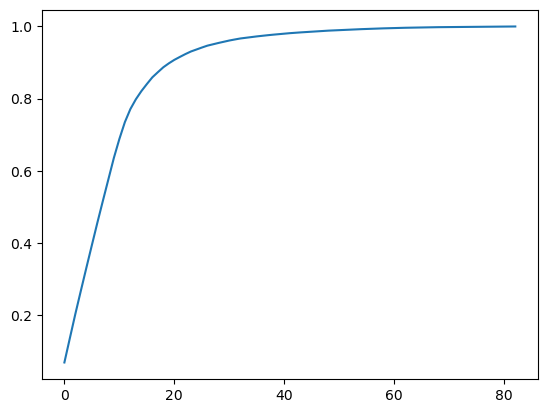

In [21]:
plt.plot(csc)